[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-aps.ipynb)

### Adaptive Prediction Sets

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

!pip install -U --no-cache-dir gdown --pre

## [Click this link](https://github.com/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-raps.ipynb) for a version of APS with much-improved practical performance.

In [2]:
# Load cached data
if not os.path.exists("../data"):
    os.system("gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz")
    os.system("tar -xf ../data.tar.gz -C ../")
    os.system("rm ../data.tar.gz")
if not os.path.exists("../data/imagenet/human_readable_labels.json"):
    !wget -nv -O ../data/imagenet/human_readable_labels.json -L https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json

data = np.load("../data/imagenet/imagenet-resnet152.npz")
example_paths = os.listdir("../data/imagenet/examples")
smx = data["smx"]
labels = data["labels"].astype(int)

In [3]:
# Problem setup
n = 1000  # number of calibration points
alpha = 0.1  # 1-alpha is the desired coverage

In [4]:
# Split the softmax scores into calibration and validation sets (save the shuffling)
idx = np.array([1] * n + [0] * (smx.shape[0] - n)) > 0
np.random.shuffle(idx)
cal_smx, val_smx = smx[idx, :], smx[~idx, :]
cal_labels, val_labels = labels[idx], labels[~idx]

### Conformal prediction happens here

In [5]:
# Get scores. calib_X.shape[0] == calib_Y.shape[0] == n
cal_pi = cal_smx.argsort(1)[:, ::-1]
cal_srt = np.take_along_axis(cal_smx, cal_pi, axis=1).cumsum(axis=1)
cal_scores = np.take_along_axis(cal_srt, cal_pi.argsort(axis=1), axis=1)[
    range(n), cal_labels
]
# Get the score quantile
qhat = np.quantile(
    cal_scores, np.ceil((n + 1) * (1 - alpha)) / n, interpolation="higher"
)
# Deploy (output=list of length n, each element is tensor of classes)
val_pi = val_smx.argsort(1)[:, ::-1]
val_srt = np.take_along_axis(val_smx, val_pi, axis=1).cumsum(axis=1)
prediction_sets = np.take_along_axis(val_srt <= qhat, val_pi.argsort(axis=1), axis=1)

In [6]:
# Calculate empirical coverage
empirical_coverage = prediction_sets[
    np.arange(prediction_sets.shape[0]), val_labels
].mean()
print(f"The empirical coverage is: {empirical_coverage}")

The empirical coverage is: 0.8876938775510204


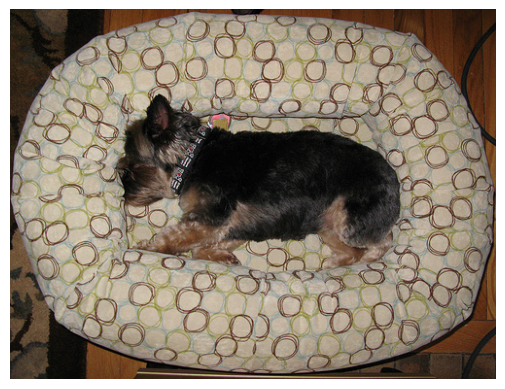

The prediction set is: [np.str_('Otterhound'), np.str_('Border Terrier'), np.str_('Norfolk Terrier'), np.str_('Norwich Terrier'), np.str_('Yorkshire Terrier'), np.str_('Wire Fox Terrier'), np.str_('Lakeland Terrier'), np.str_('Airedale Terrier'), np.str_('Cairn Terrier'), np.str_('Australian Terrier'), np.str_('Dandie Dinmont Terrier'), np.str_('Miniature Schnauzer'), np.str_('Standard Schnauzer'), np.str_('Scottish Terrier'), np.str_('Australian Silky Terrier'), np.str_('German Shepherd Dog')]


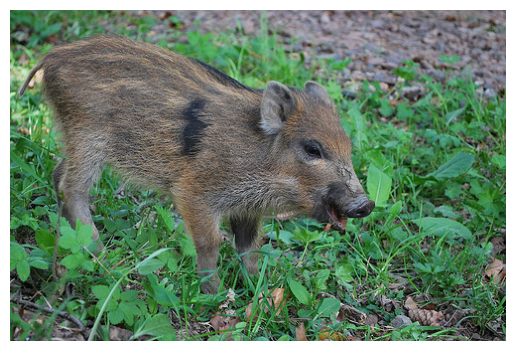

The prediction set is: [np.str_('pig'), np.str_('wild boar')]


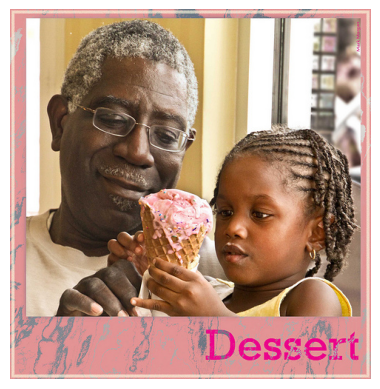

The prediction set is: [np.str_('tench'), np.str_('goldfish'), np.str_('great white shark'), np.str_('electric ray'), np.str_('stingray'), np.str_('cock'), np.str_('hen'), np.str_('brambling'), np.str_('house finch'), np.str_('junco'), np.str_('American robin'), np.str_('bulbul'), np.str_('magpie'), np.str_('chickadee'), np.str_('American dipper'), np.str_('kite'), np.str_('bald eagle'), np.str_('vulture'), np.str_('great grey owl'), np.str_('axolotl'), np.str_('American bullfrog'), np.str_('tailed frog'), np.str_('loggerhead sea turtle'), np.str_('leatherback sea turtle'), np.str_('mud turtle'), np.str_('terrapin'), np.str_('box turtle'), np.str_('banded gecko'), np.str_('green iguana'), np.str_('desert grassland whiptail lizard'), np.str_('agama'), np.str_('frilled-necked lizard'), np.str_('alligator lizard'), np.str_('Gila monster'), np.str_('chameleon'), np.str_('Nile crocodile'), np.str_('American alligator'), np.str_('triceratops'), np.str_('ring-necked snake'), np.str_('eastern 

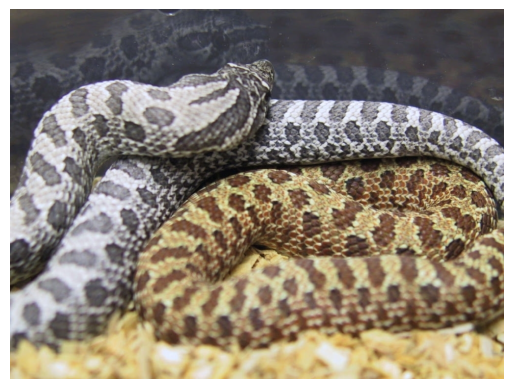

The prediction set is: [np.str_('American bullfrog'), np.str_('Gila monster'), np.str_('worm snake'), np.str_('ring-necked snake'), np.str_('eastern hog-nosed snake'), np.str_('kingsnake'), np.str_('garter snake'), np.str_('water snake'), np.str_('night snake'), np.str_('boa constrictor'), np.str_('African rock python'), np.str_('Indian cobra'), np.str_('sea snake'), np.str_('Saharan horned viper'), np.str_('eastern diamondback rattlesnake'), np.str_('sidewinder')]


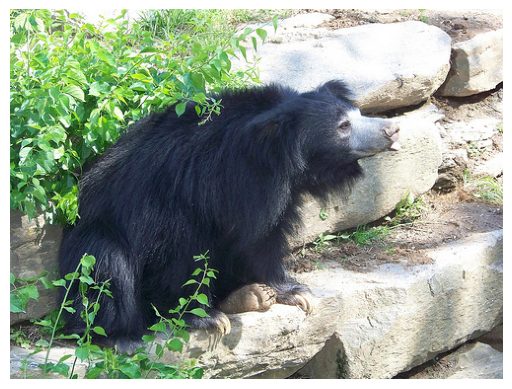

The prediction set is: []


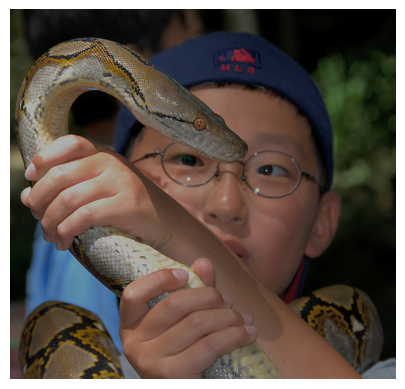

The prediction set is: [np.str_('tiger shark'), np.str_('banded gecko'), np.str_('green iguana'), np.str_('Carolina anole'), np.str_('desert grassland whiptail lizard'), np.str_('frilled-necked lizard'), np.str_('alligator lizard'), np.str_('European green lizard'), np.str_('Nile crocodile'), np.str_('American alligator'), np.str_('worm snake'), np.str_('ring-necked snake'), np.str_('eastern hog-nosed snake'), np.str_('smooth green snake'), np.str_('kingsnake'), np.str_('garter snake'), np.str_('water snake'), np.str_('vine snake'), np.str_('night snake'), np.str_('boa constrictor'), np.str_('African rock python'), np.str_('Indian cobra'), np.str_('green mamba'), np.str_('sea snake'), np.str_('Saharan horned viper'), np.str_('eastern diamondback rattlesnake'), np.str_('sidewinder'), np.str_('hornbill'), np.str_('conch'), np.str_('Dungeness crab'), np.str_('fiddler crab'), np.str_('red king crab'), np.str_('spiny lobster'), np.str_('crayfish'), np.str_('armadillo'), np.str_('snoek'), np

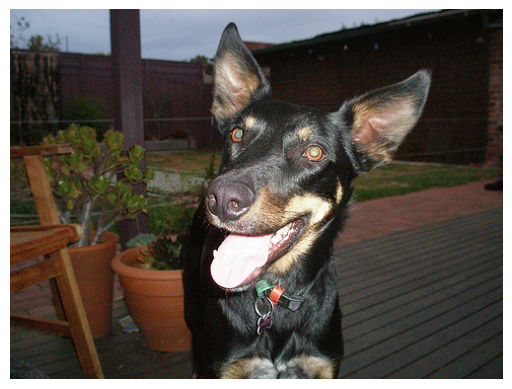

The prediction set is: [np.str_('Australian Kelpie'), np.str_('Rottweiler'), np.str_('Dobermann'), np.str_('Miniature Pinscher')]


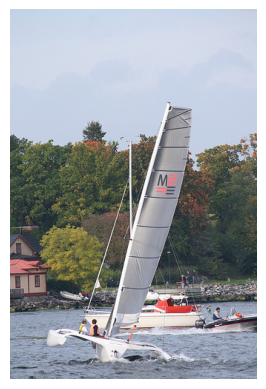

The prediction set is: [np.str_('Schipperke'), np.str_('balloon'), np.str_('lighthouse'), np.str_('boathouse'), np.str_('catamaran'), np.str_('dock'), np.str_('fireboat'), np.str_('flagpole'), np.str_('lifeboat'), np.str_('ocean liner'), np.str_('pirate ship'), np.str_('planetarium'), np.str_('pole'), np.str_('schooner'), np.str_('space shuttle'), np.str_('motorboat'), np.str_('submarine'), np.str_('sundial'), np.str_('trimaran'), np.str_('water tower'), np.str_('wing'), np.str_('shipwreck'), np.str_('yawl'), np.str_('lakeshore'), np.str_('shoal')]


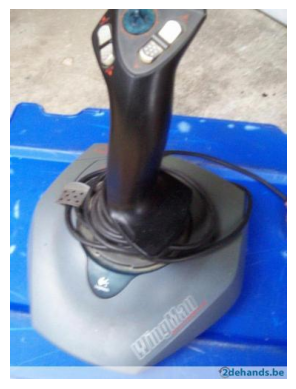

The prediction set is: []


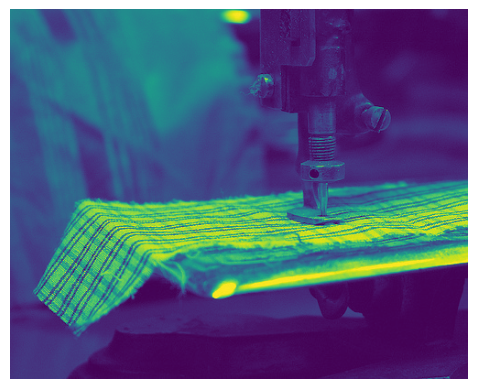

The prediction set is: [np.str_('hammer'), np.str_('clothes iron'), np.str_('joystick'), np.str_('mousetrap'), np.str_('nail'), np.str_('power drill'), np.str_('screw'), np.str_('screwdriver'), np.str_('sewing machine')]


In [7]:
# Show some examples
with open("../data/imagenet/human_readable_labels.json") as f:
    label_strings = np.array(json.load(f))

example_paths = os.listdir("../data/imagenet/examples")
for i in range(10):
    rand_path = np.random.choice(example_paths)
    img = imread("../data/imagenet/examples/" + rand_path)
    img_index = int(rand_path.split(".")[0])
    img_pi = smx[img_index].argsort()[::-1]
    img_srt = np.take_along_axis(smx[img_index], img_pi, axis=0).cumsum()
    prediction_set = np.take_along_axis(img_srt <= qhat, img_pi.argsort(), axis=0)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print(f"The prediction set is: {list(label_strings[prediction_set])}")

This method was first introduced in https://arxiv.org/abs/2006.02544 and studied further for image classifiers in https://arxiv.org/abs/2009.14193.